# Human Resources Attrition Project
- **Nama:** Ahmad Sabil Deva Pratama
- **Email:** devapratama4912@gmail.com
- **ID Dicoding:** devaprtm49

# **1. Persiapan: Menyiapkan Library**
Pada bagian ini, kita akan mengimpor semua library yang diperlukan untuk eksplorasi data dan analisis.


In [1]:
!pip install category_encoders -q
!pip uninstall -y scikit-learn -q
!pip install scikit-learn==1.5.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.5 MB/s eta 0:00:00


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model selection and training
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Save models
import joblib

# Mengatur tampilan untuk melihat semua kolom pada DataFrame
pd.set_option('display.max_columns', None)

# **2. Data Understanding**
Langkah ini bertujuan untuk memahami struktur data dan kualitasnya.
Kita akan memeriksa:
1. **Duplikat**: Untuk memastikan tidak ada data yang terduplikasi.
2. **Missing Value**: Untuk mengidentifikasi data yang hilang.
3. **Exploratory Data Analysis (EDA)**: Fokus pada analisis yang relevan dengan bisnis metric seperti *Attrition Rate*, *Job Satisfaction Index*, dan *Average Work-Life Balance*.


## **2.1. Membaca dan Melihat Data**

In [3]:
df = pd.read_csv('employee_data.csv')
print("Dimensi dataset:", df.shape)
df.head()

Dimensi dataset: (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


Dataset terdiri dari 1470 baris dan 35 kolom. Di atas adalah isi dari 5 baris teratas.

## **2.3. Analisis Data Duplikat**


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


Tidak ada duplikat dari dataset.

## **2.3. Analisis Missing Value**


In [5]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data['Percentage'] = missing_data['Percentage'].round(2)
print("Jumlah dan Persentase Missing Values per Kolom:\n\n", missing_data)

Jumlah dan Persentase Missing Values per Kolom:

                           Missing Values  Percentage
EmployeeId                             0        0.00
Age                                    0        0.00
Attrition                            412       28.03
BusinessTravel                         0        0.00
DailyRate                              0        0.00
Department                             0        0.00
DistanceFromHome                       0        0.00
Education                              0        0.00
EducationField                         0        0.00
EmployeeCount                          0        0.00
EnvironmentSatisfaction                0        0.00
Gender                                 0        0.00
HourlyRate                             0        0.00
JobInvolvement                         0        0.00
JobLevel                               0        0.00
JobRole                                0        0.00
JobSatisfaction                        0        0

Kolom attrition memiliki 412 atau sebanyak 28.03% data kosong atau NaN. Data kosong ini perlu ditangani dan karena data yang kosong cukup banyak yaitu 28.03% kosong, maka agar tidak menjadi bias baris yang kosong akan dihapus.

## **2.4. Exploratory Data Analysis (EDA)**

EDA adalah langkah penting untuk memahami data dan mendapatkan insight yang relevan dengan tujuan bisnis. Fokus utama adalah menganalisis tiga metrik: Attrition Rate, Job Satisfaction Index, dan Average Work-Life Balance.

---
### **1. Attrition Rate**
#### **Definisi**
Attrition Rate adalah persentase karyawan yang meninggalkan perusahaan dalam periode tertentu. Metrik ini penting untuk memahami tingkat turnover dan mengidentifikasi faktor-faktor yang memengaruhinya.

#### **Rumus**
$$
\text{Attrition Rate} = \frac{\text{Jumlah Karyawan yang Keluar}}{\text{Jumlah Total Karyawan}} \times 100
$$

#### **Penjelasan**
- Jumlah Karyawan yang Keluar: Jumlah karyawan yang diberi label **1** pada kolom `Attrition` dalam dataset.
- Jumlah Total Karyawan: Total jumlah baris dalam dataset (karyawan aktif maupun keluar).

---
### **2. Job Satisfaction Index**
#### **Definisi**
Job Satisfaction Index adalah skor rata-rata kepuasan kerja karyawan berdasarkan data survei atau skor yang diberikan pada atribut `JobSatisfaction`.

#### **Rumus**
$$
\text{Job Satisfaction Index} = \frac{\sum_{i=1}^{n} \text{Job Satisfaction}_i}{n}
$$

#### **Penjelasan**
- $$(\sum_{i=1}^{n} \text{Job Satisfaction}_i)\$$ adalah jumlah dari semua skor `JobSatisfaction` yang nilainya berkisar dari 1 hingga 4.

- $$(n)$$ adalah total jumlah karyawan yang dinilai.

---
### **3. Average Work-Life Balance**
#### **Definisi**
Average Work-Life Balance mengukur tingkat keseimbangan antara pekerjaan dan kehidupan pribadi karyawan. Skor ini dinyatakan dalam kolom `WorkLifeBalance`.

#### **Rumus**
$$
\text{Average Work-Life Balance} = \frac{\sum_{i=1}^{n} \text{Work-Life Balance}_i}{n}
$$

#### **Penjelasan**
- $$(\sum_{i=1}^{n} \text{Work-Life Balance}_i)$$ adalah jumlah dari semua skor pada atribut `WorkLifeBalance` yang nilainya berkisar dari 1 hingga 4.
- $$(n)$$ adalah total jumlah karyawan yang dinilai.

---

### **Tujuan Dari Ketiga Metrik**
1. **Attrition Rate**: Membantu memahami tingkat turnover karyawan dan penyebab utamanya, sehingga perusahaan dapat mengurangi kehilangan karyawan yang potensial.
2. **Job Satisfaction Index**: Menyoroti area operasional atau hierarki pekerjaan yang membutuhkan intervensi untuk meningkatkan kepuasan karyawan.
3. **Average Work-Life Balance**: Menilai apakah kebijakan perusahaan mendukung keseimbangan kerja-hidup yang memadai, sehingga dapat mencegah burnout dan risiko keluar.

### **2.4.1 Attrition Rate**
Attrition Rate adalah metrik utama yang menunjukkan rasio karyawan yang keluar. Analisis yang dilakukan adalah:
1. Menghitung persentase karyawan yang keluar.
2. Menganalisis distribusi attrition berdasarkan faktor usia.
3. Melihat distribusi attrition berdasarkan variabel kerja (departemen, job level, environment satisfaction).



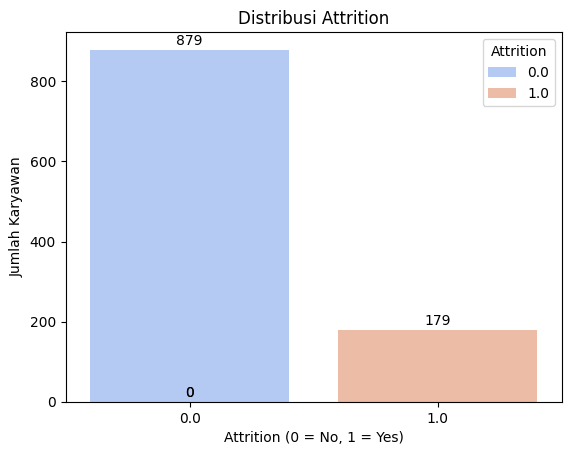


Attrition Rate: 16.92%


In [6]:
# Visualisasi distribusi attrition
ax = sns.countplot(data=df, x='Attrition', hue='Attrition', palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')
plt.title("Distribusi Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Jumlah Karyawan")
plt.show()

# Menghitung Attrition Rate
attrition_rate = df['Attrition'].value_counts(normalize=True)[1] * 100
print(f"\nAttrition Rate: {attrition_rate:.2f}%")

Dari keseluruhan karyawan, ada 179 yang mengalami attrition (keluar dari perusahaan), sementara 879 karyawan tetap. Ini memberikan gambaran bahwa attrition rate secara keseluruhan adalah sekitar 16.92% (179/1058).

#### **2.4.1. Distribusi Attrition Berdasarkan Usia**
Usia karyawan dapat memengaruhi tingkat keluar (attrition). Kami akan melihat distribusi usia dan menghitung rata-rata usia berdasarkan status attrition.


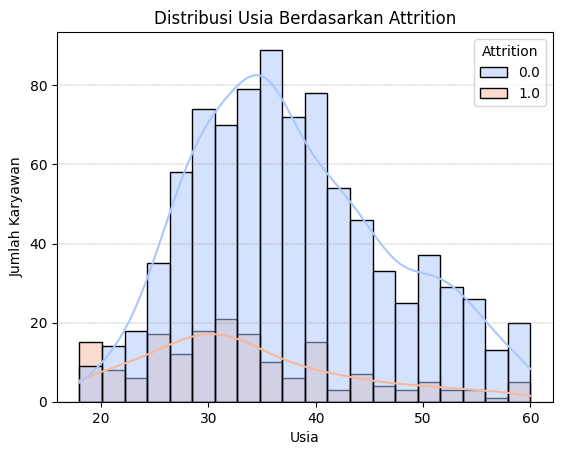

In [7]:
# Visualisasi distribusi usia
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20, palette='coolwarm')
plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Distribusi Usia Berdasarkan Attrition")
plt.xlabel("Usia")
plt.ylabel("Jumlah Karyawan")
plt.show()

Histogram menunjukkan bahwa karyawan yang tidak mengalami attrition (0.0) cenderung lebih muda, dengan puncak distribusi di usia sekitar 30-40 tahun. Sementara itu, karyawan yang mengalami attrition (1.0) memiliki distribusi usia yang lebih rata, namun dengan puncak di usia yang lebih muda (sekitar 25-35 tahun). Ini menunjukkan bahwa karyawan yang lebih muda mungkin lebih cenderung untuk berhenti.

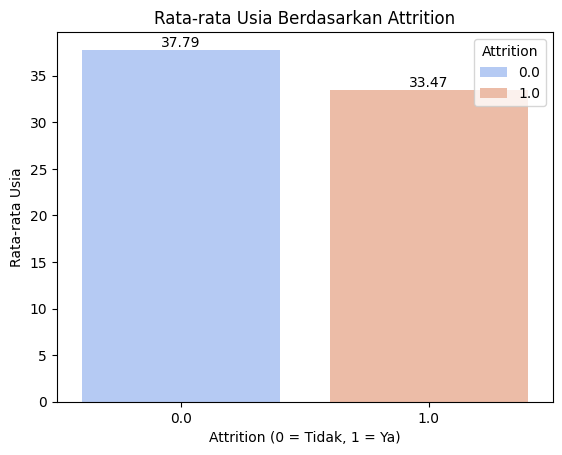

In [8]:
# Rata-rata Usia Berdasarkan Attrition
age_by_attrition = df.groupby('Attrition')['Age'].mean()
sns.barplot(x=age_by_attrition.index, y=age_by_attrition.values, hue=age_by_attrition.index, palette="coolwarm")
for i, value in enumerate(age_by_attrition.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title("Rata-rata Usia Berdasarkan Attrition")
plt.xlabel("Attrition (0 = Tidak, 1 = Ya)")
plt.ylabel("Rata-rata Usia")
plt.show()

Karyawan yang tidak mengalami attrition memiliki rata-rata usia sekitar 37.79 tahun, sedangkan yang mengalami attrition lebih muda dengan rata-rata usia 33.47 tahun. Ini mendukung insight dari distribusi usia bahwa karyawan yang lebih muda lebih rentan terhadap attrition.

#### **2.4.2 Distribusi Attrition Berdasarkan Departemen**
Beberapa departemen mungkin memiliki tingkat keluar (attrition) lebih tinggi. Ini dapat membantu memahami area kerja yang memerlukan perhatian lebih.


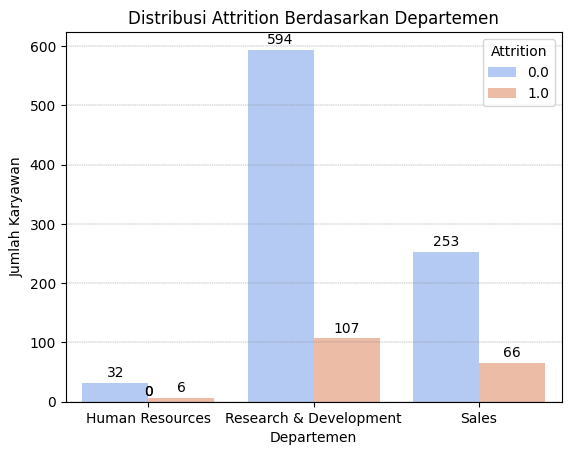

In [9]:
# Visualisasi distribusi departemen
ax = sns.countplot(data=df, x='Department', hue='Attrition', palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Distribusi Attrition Berdasarkan Departemen")
plt.xlabel("Departemen")
plt.ylabel("Jumlah Karyawan")
plt.show()

Departemen Research & Development memiliki jumlah karyawan terbesar (594) yang tidak mengalami attrition, namun juga memiliki jumlah karyawan yang cukup besar (107) yang mengalami attrition. Sales juga menunjukkan pola serupa dengan 253 karyawan yang tidak mengalami attrition dan 66 yang mengalami attrition. Human Resources, meskipun kecil, menunjukkan bahwa hampir semua karyawan tetap, dengan hanya 6 yang mengalami attrition.

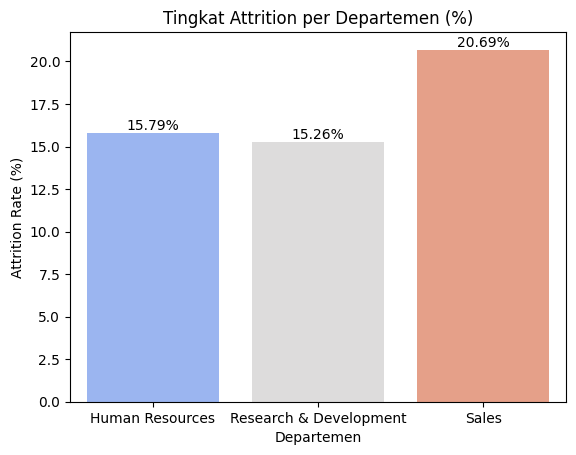

In [10]:
attrition_by_department = df.groupby('Department')['Attrition'].mean() * 100

sns.barplot(x=attrition_by_department.index, y=attrition_by_department.values, hue=attrition_by_department.index, palette="coolwarm")
for i, value in enumerate(attrition_by_department.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title("Tingkat Attrition per Departemen (%)")
plt.xlabel("Departemen")
plt.ylabel("Attrition Rate (%)")
plt.show()

Tingkat attrisi atau turnover karyawan paling tinggi terjadi pada departemen Sales, yaitu mencapai 20,69%. Ini artinya, dari seluruh karyawan di departemen Sales, sekitar 20,69% di antaranya telah meninggalkan perusahaan. Sementara itu, departemen Research & Development memiliki tingkat attrisi yang paling rendah, yakni 15,26%. Departemen dengan tingkat attrisi rendah ke 2 adalah Human Resources, hanya 15,79%. Dari data ini, dapat disimpulkan bahwa departemen Sales perlu mendapatkan perhatian lebih dari pihak manajemen terkait upaya mengurangi tingkat turnover karyawan.

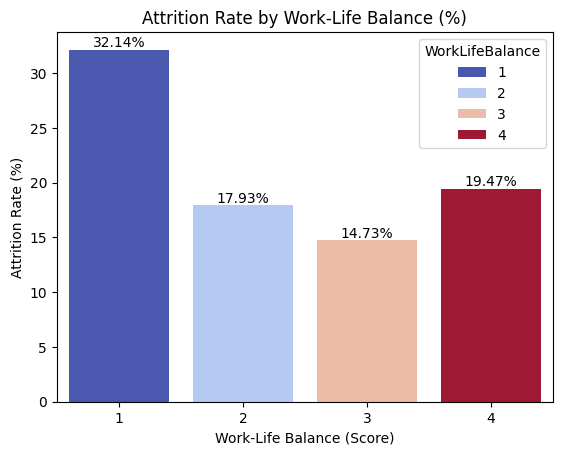

In [11]:
work_life_attrition = df.groupby('WorkLifeBalance')['Attrition'].mean() * 100

sns.barplot(x=work_life_attrition.index, y=work_life_attrition.values, hue=work_life_attrition.index, palette="coolwarm")
for i, value in enumerate(work_life_attrition.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title("Attrition Rate by Work-Life Balance (%)")
plt.xlabel("Work-Life Balance (Score)")
plt.ylabel("Attrition Rate (%)")
plt.show()

Karyawan dengan skor work-life balance terendah, yaitu 1, memiliki tingkat attrisi tertinggi, mencapai 32,14%. Seiring peningkatan skor work-life balance, tingkat attrisi cenderung menurun, hingga hanya 19,47% pada karyawan dengan skor 4. Hal ini mengindikasikan bahwa upaya meningkatkan keseimbangan antara pekerjaan dan kehidupan pribadi karyawan dapat menjadi strategi efektif untuk menurunkan tingkat turnover.

#### **2.4.3 Analisis Faktor Lingkungan dan Kepuasan**
Variabel seperti **Environment Satisfaction** dan **Job Satisfaction** dapat memengaruhi tingkat keluar (attrition). Kami akan menganalisis hubungan ini.


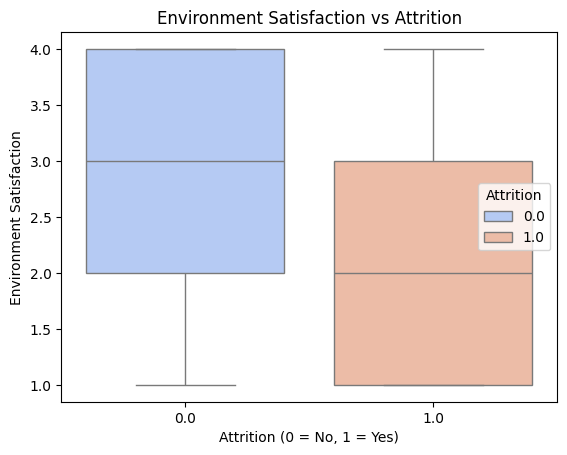

In [12]:
# Visualisasi Environment Satisfaction
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction', hue='Attrition', palette='coolwarm')
plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Environment Satisfaction")
plt.show()

karyawan yang tidak mengalami attrisi (skor 0,0) cenderung memiliki environment satisfication score kerja yang jauh lebih tinggi dibandingkan mereka yang mengalami attrisi (skor 1,0). Hal ini mengindikasikan adanya korelasi antara lingkungan kerja yang kurang memuaskan dengan kecenderungan karyawan untuk meninggalkan perusahaan.

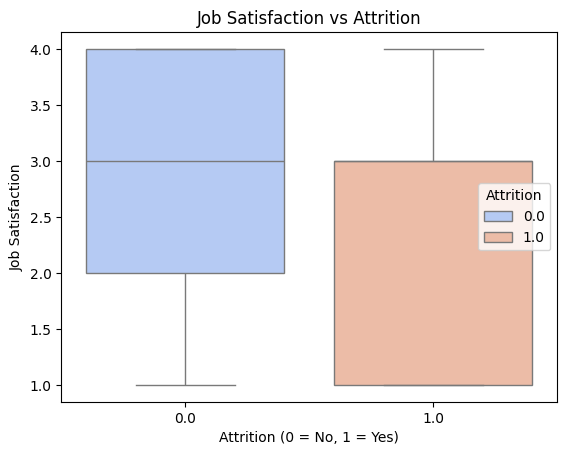

In [13]:
# Visualisasi Job Satisfaction
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition', palette='coolwarm')
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Job Satisfaction")
plt.show()

Serupa dengan pola pada environment satisfication, visualisasi di atas menunjukkan bahwa karyawan yang tidak mengalami attrisi (skor 0,0) memiliki job satisfication score yang jauh lebih tinggi dibandingkan mereka yang mengalami attrisi (skor 1,0). Ini menandakan bahwa upaya meningkatkan job satisfication score karyawan juga dapat menjadi strategi penting untuk menurunkan tingkat turnover.

### **2.4.2 Job Satisfaction Index**
Indeks ini mencerminkan rata-rata kepuasan kerja karyawan. Analisis dilakukan untuk:
1. Menghitung rata-rata indeks kepuasan kerja.
2. Melihat distribusi kepuasan kerja berdasarkan departemen dan level pekerjaan.



In [14]:
# Rata-rata Job Satisfaction Index
job_satisfaction_index = df['JobSatisfaction'].mean()
print(f"Rata-rata Job Satisfaction Index: {job_satisfaction_index:.2f}")

Rata-rata Job Satisfaction Index: 2.73


Dengan skor rata-rata 2.73 dari 4, Job satisfication memiliki rata-rata skor yang kurang baik sehingga manajemen perusahaan perlu untuk meningkatkan skor tersebut karena skor job satisfication berkorelasi dengan tingkat atrisi.

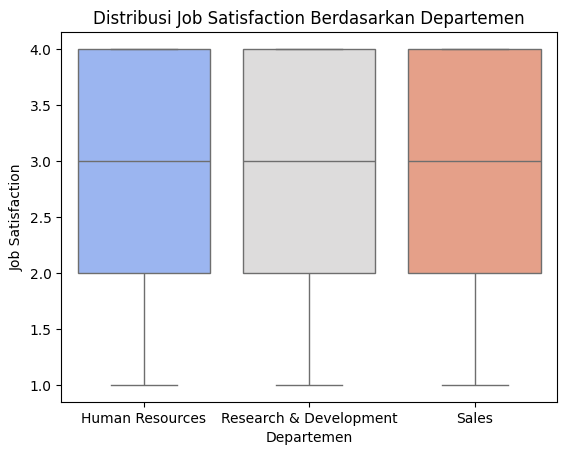

In [15]:
# Distribusi berdasarkan departemen
sns.boxplot(data=df, x='Department', y='JobSatisfaction', hue='Department', palette='coolwarm')
plt.title("Distribusi Job Satisfaction Berdasarkan Departemen")
plt.xlabel("Departemen")
plt.ylabel("Job Satisfaction")
plt.show()

Ketiga departemen memiliki job satisfication score yang cenderung sama

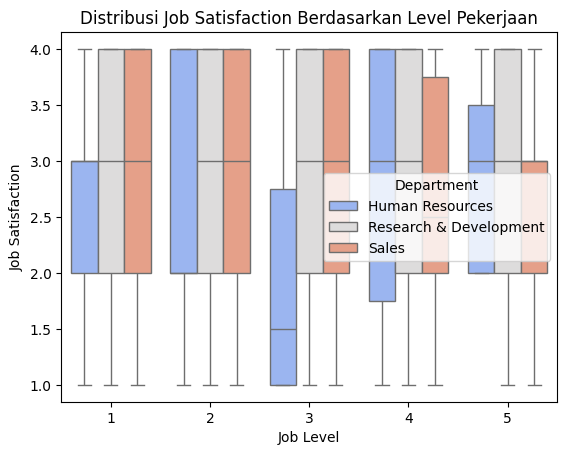

In [16]:
# Distribusi berdasarkan level pekerjaan
sns.boxplot(data=df, x='JobLevel', y='JobSatisfaction', hue='Department', palette='coolwarm')
plt.title("Distribusi Job Satisfaction Berdasarkan Level Pekerjaan")
plt.xlabel("Job Level")
plt.ylabel("Job Satisfaction")
plt.show()

karyawan dengan level pekerjaan yang lebih tinggi cenderung memiliki skor kepuasan kerja yang lebih rendah. Karyawan dengan level pekerjaan 3 hingga 5 memiliki skor kepuasan kerja yang lebih rendah dibandingkan mereka yang berada di level 1 dan 2.

### **2.4.3 Work-Life Balance**
Keseimbangan kerja-hidup yang buruk dapat menyebabkan kelelahan karyawan dan meningkatkan risiko keluar. Analisis dilakukan untuk:
1. Distribusi Work-Life Balance.
2. Hubungan Work-Life Balance dengan Attrition.


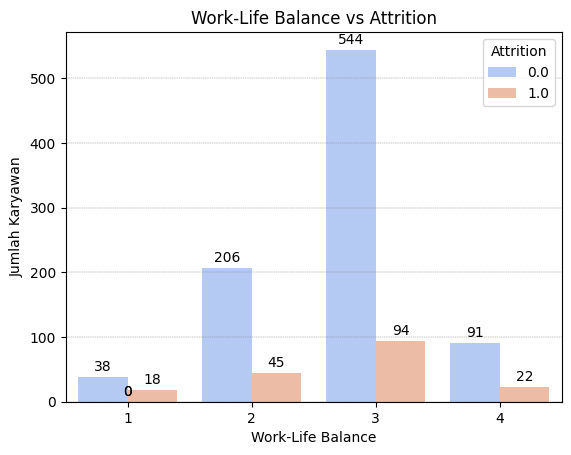

In [17]:
# Visualisasi Work-Life Balance
ax = sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Work-Life Balance vs Attrition")
plt.xlabel("Work-Life Balance")
plt.ylabel("Jumlah Karyawan")
plt.show()

Dari visualisasi di atas, terlihat semakin baik work-life balance score, semakin rendah tingkat attrisi karyawan. Karyawan dengan skor keseimbangan 4 memiliki tingkat attrisi terendah.

# **3. Data Preparation**

## **3.1. Menangani Missing Values**

Kolom `Attrition` adalah target variabel. Karena memiliki 28% nilai kosong, kita tidak bisa mengisi (imputasi) nilai ini tanpa risiko menambahkan bias signifikan. Dengan menghapus baris, kita memastikan hanya data lengkap yang digunakan.

In [18]:
# Menghapus baris dengan nilai kosong di kolom Attrition
df = df.dropna(subset=['Attrition'])
print("Ukuran dataset setelah menghapus missing values:", df.shape)

Ukuran dataset setelah menghapus missing values: (1058, 35)


Dataset asli berukuran `(1470, 35)`. Setelah menghapus 412 baris dengan nilai kosong pada kolom `Attrition`, ukuran dataset menjadi `(1058, 35)`. Data ini sekarang bebas dari missing values.

## **3.2. Mengonversi Variabel Kategorikal dan Normalisasi Fitur**

Teknik Preprocessing yang Digunakan

1. Binary Encoding: Untuk mengubah variabel biner menjadi format numerik yang dapat digunakan oleh model ML tanpa menambahkan banyak dimensi seperti one-hot encoding untuk variabel biner. BinaryEncoder dari `category_encoders` mengubah satu kolom biner menjadi beberapa kolom biner yang mewakili nilai dalam bentuk biner.

2. One-Hot Encoding: Untuk mengubah variabel kategorikal menjadi representasi numerik yang tidak menyiratkan urutan atau hierarki antar kategori. OneHotEncoder dari `category_encoders` digunakan dengan `use_cat_names=True` untuk memberikan nama kolom yang deskriptif dan mudah dibaca.

3. Standard Scaling: Untuk normalisasi fitur numerik, memastikan semua fitur berkontribusi secara setara dalam training model tanpa satu fitur mendominasi karena skala yang berbeda. StandardScaler mengubah data sehingga nilai rata-rata menjadi 0 dan standar deviasi menjadi 1.

In [19]:
binary_columns = ['Gender', 'Over18', 'OverTime']
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus',
                       'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
                       'RelationshipSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'JobLevel', 'StockOptionLevel']
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Pipelines preprocessing
binary_transformer = Pipeline(steps=[
    ('binary', ce.BinaryEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ce.OneHotEncoder(use_cat_names=True))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Setup preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

X = df.drop(columns=['Attrition', 'EmployeeId'])
y = df['Attrition']

X = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()
df_transformed = pd.DataFrame(X, columns=feature_names)

joblib.dump(preprocessor, 'preprocessor_model.joblib')

print("Ukuran dataset setelah transformasi:", df_transformed.shape)

Ukuran dataset setelah transformasi: (1058, 52)


Dataset sekarang memiliki lebih banyak kolom yaitu 52 kolom setelah preprocessing di atas. Semua data kategorikal termasuk yang biner telah diubah menjadi bentuk numerik yang sesuai untuk input model ML. Fitur numerik telah discaling, yang membantu dalam pembelajaran model dengan algoritma yang sensitif terhadap skala data seperti SVM, k-NN, atau neural networks. One-hot encoding untuk variabel kategorikal menghasilkan kolom baru, tetapi dengan manajemen yang baik untuk menghindari curse of dimensionality.

## **3.3. Split Data dan Oversampling Data dengan SMOTE**

Sebelum melakukan oversampling, data dibagi menjadi set pelatihan (train) dan set pengujian (test) dengan perbandingan 80:20 menggunakan train_test_split. Ini dilakukan sebelum SMOTE untuk menghindari data leakage atau kebocoran data. Test set harus tetap mencerminkan distribusi asli data.

Variabel target `Attrition` tidak seimbang, di mana jumlah `Attrition=0` lebih banyak dibandingkan `Attrition=1`. Oversampling dengan SMOTE menciptakan sampel sintetis untuk kelas minoritas, sehingga meningkatkan performa model. Oversampling menggunakan Synthetic Minority Oversampling Technique (SMOTE). Hanya data pelatihan yang di-resample dengan SMOTE untuk membuat dataset yang lebih seimbang tanpa mempengaruhi data uji.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution of target before SMOTE (Training set):")
print(y_train.value_counts())
print("\nDistribution of target after SMOTE (Training set):")
print(pd.Series(y_train_resampled).value_counts())

print("\nSize of training data after SMOTE:", X_train_resampled.shape)
print("Size of test data (unchanged):", X_test.shape)

Distribution of target before SMOTE (Training set):
Attrition
0.0    706
1.0    140
Name: count, dtype: int64

Distribution of target after SMOTE (Training set):
Attrition
0.0    706
1.0    706
Name: count, dtype: int64

Size of training data after SMOTE: (1412, 52)
Size of test data (unchanged): (212, 52)


Sekarang memiliki distribusi kelas yang lebih seimbang, yang dapat membantu model untuk belajar dari kedua kelas dengan lebih adil. Tetapi data test tetap memiliki distribusi asli, memberikan evaluasi yang realistis tentang performa model pada data asli.

# **4. Modeling**

## **4.1. Pemilihan Algoritma**

Project ini akan menggunakan tiga algoritma berikut:

1. **K-Nearest Neighbors (KNN):**
   - Algoritma berbasis tetangga terdekat yang sederhana dan efektif.
   - Cocok untuk dataset kecil hingga menengah dengan distribusi data yang jelas.
   - Menggunakan metrik jarak seperti Euclidean untuk menentukan kedekatan antar data.

2. **Random Forest (RF):**
   - Algoritma ensemble berbasis pohon keputusan yang kuat terhadap outlier dan non-linearitas.
   - Mengurangi overfitting dibandingkan pohon keputusan tunggal.

3. **XGBoost (XGB):**
   - Algoritma boosting berbasis gradien yang efisien.
   - Memiliki kemampuan bawaan untuk menangani ketidakseimbangan data dengan pengaturan **scale_pos_weight**.
   - Populer dalam industri karena kecepatan dan performa tinggi pada dataset dengan dimensi besar.

## **4.2. Proses Modeling**

### **4.2.1. Model KNN**

**Penjelasan Hyperparameter KNN**:
- **`n_neighbors`**: Jumlah tetangga terdekat yang dipertimbangkan untuk menentukan kelas. Semakin kecil nilai `n_neighbors`, model lebih sensitif terhadap noise (overfitting). Semakin besar nilai `n_neighbors`, model lebih sederhana dan lebih stabil, tetapi berisiko underfitting.
- **`weights`**: Metode penghitungan bobot untuk tetangga. `uniform` memberi bobot yang sama untuk semua tetangga, sementara `distance` memberikan bobot lebih pada tetangga yang lebih dekat, membuat model lebih responsif terhadap data lokal.
- **`metric`**: Metrik yang digunakan untuk menghitung jarak antar titik data. `euclidean` adalah metrik standar, sementara `manhattan` lebih sesuai untuk data diskrit atau data dengan dimensi besar, dan `chebyshev` mengukur jarak dengan mempertimbangkan dimensi yang paling dominan.

In [21]:
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("Best parameters for KNN:", grid_search_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Classification Report - KNN
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       173
         1.0       0.29      0.31      0.30        39

    accuracy                           0.73       212
   macro avg       0.56      0.57      0.57       212
weighted avg       0.74      0.73      0.73       212



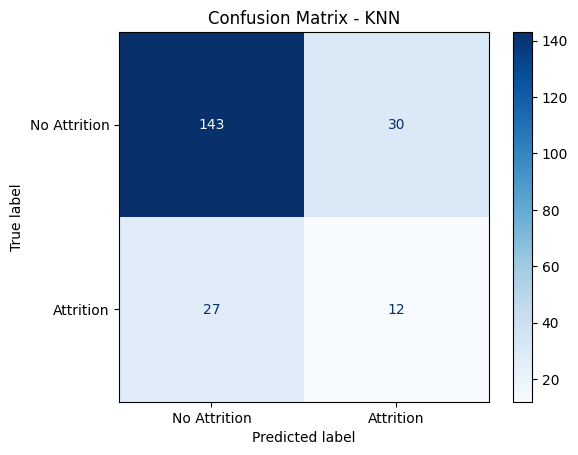

['best_knn_model.joblib']

In [22]:
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Classification Report
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Attrition', 'Attrition'])
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()

joblib.dump(best_knn_model, 'best_knn_model.joblib')

- **True Positives (TP):** 143
- **False Positives (FP):** 30
- **False Negatives (FN):** 27
- **True Negatives (TN):** 12

### **4.2.2. Model Random Forest**

**Penjelasan Hyperparameter Random Forest**:
- **`n_estimators`**: Jumlah pohon (trees) yang digunakan dalam forest. Semakin banyak pohon, model akan lebih stabil, namun juga membutuhkan lebih banyak waktu untuk pelatihan.
- **`max_depth`**: Kedalaman maksimum dari setiap pohon. Pohon yang lebih dalam dapat menyebabkan overfitting, jadi semakin kecil nilai `max_depth`, model akan lebih sederhana.
- **`min_samples_split`**: Minimum jumlah sampel yang diperlukan untuk membagi node internal. Nilai yang lebih besar akan membantu mengurangi overfitting dengan membuat pohon lebih umum.
- **`min_samples_leaf`**: Minimum jumlah sampel yang diperlukan untuk membentuk sebuah leaf node. Nilai yang lebih besar akan membuat model lebih sederhana dan mengurangi overfitting.

In [23]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       173
         1.0       0.73      0.28      0.41        39

    accuracy                           0.85       212
   macro avg       0.80      0.63      0.66       212
weighted avg       0.83      0.85      0.82       212



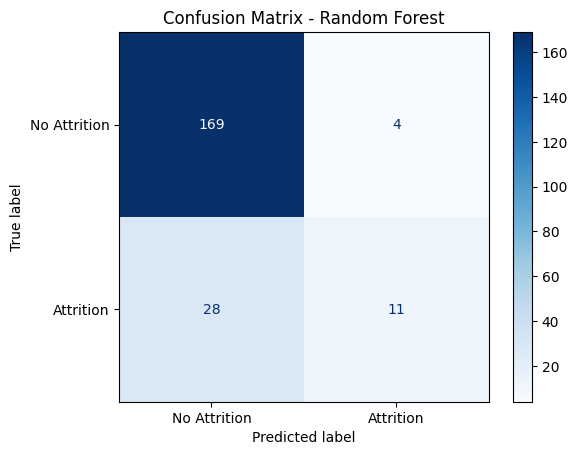

['best_rf_model.joblib']

In [24]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Classification report
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Attrition', 'Attrition'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

joblib.dump(best_rf_model, 'best_rf_model.joblib')

- **True Positives (TP):** 169
- **False Positives (FP):** 4
- **False Negatives (FN):** 28  
- **True Negatives (TN):** 11

### **4.2.3. Model XGBoost**

**Penjelasan hyperparameter XGBoost**:
- **`n_estimators`**: Jumlah boosting rounds (atau trees) yang akan dilatih. Semakin banyak pohon, model mungkin akan lebih akurat, tetapi juga bisa mengalami overfitting dan pelatihan yang lebih lama.
- **`max_depth`**: Kedalaman maksimum dari pohon yang dibuat dalam boosting. Semakin dalam pohon, semakin besar risiko overfitting, jadi nilai ini sering kali disesuaikan agar tidak terlalu dalam.
- **`subsample`**: Prosentase data yang digunakan untuk setiap boosting round. Nilai yang lebih rendah dapat membantu mengurangi overfitting dengan memperkenalkan elemen keacakan pada model.
- **`colsample_bytree`**: Fraksi fitur yang digunakan untuk setiap pohon. Mengurangi nilai ini dapat membantu menghindari overfitting dan membuat model lebih robust.

In [25]:
xgb_model = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}


Classification Report - XGBoost
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       173
         1.0       0.67      0.41      0.51        39

    accuracy                           0.85       212
   macro avg       0.77      0.68      0.71       212
weighted avg       0.84      0.85      0.84       212



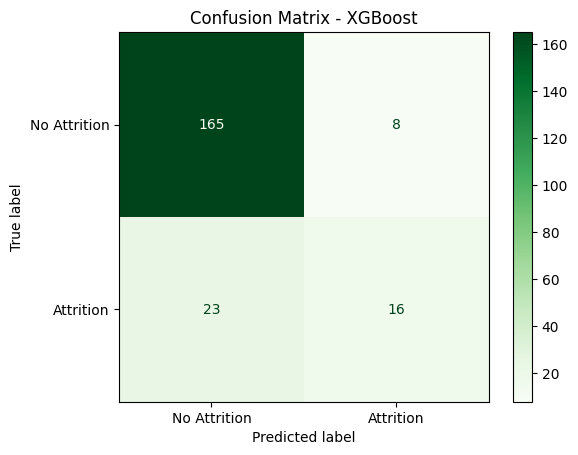

['best_xgb_model.joblib']

In [26]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Classification report
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Attrition', 'Attrition'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

- **True Positives (TP):** 165
- **False Positives (FP):** 8
- **False Negatives (FN):** 23  
- **True Negatives (TN):** 16

# **5. Evaluasi Model**

Evaluasi dilakukan menggunakan metrik berikut:

1. **Accuracy**: Akurasi adalah persentase dari semua prediksi yang benar (baik positif maupun negatif) dibandingkan dengan total prediksi yang dibuat. Ini memberikan gambaran umum performa model tetapi bisa menyesatkan jika dataset tidak seimbang.

   $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

2. **Precision**: Presisi mengukur seberapa akurat model dalam mengidentifikasi kasus positif. Ini menunjukkan proporsi dari kasus yang diprediksi positif yang sebenarnya positif.

   $$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **Recall**: Recall mengukur kemampuan model untuk menemukan semua kasus positif yang ada dalam dataset. Ini adalah proporsi dari kasus positif yang benar-benar diidentifikasi oleh model.

   $$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **F1-Score**: F1-Score adalah rata-rata harmonis dari presisi dan recall, memberikan skor tunggal yang mencerminkan keseimbangan antara keduanya. Berguna ketika ingin melihat performa model di kedua metrik tersebut.

   $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

---

Berikut hasil perhitungan evaluasi model **Random Forest**, **XGBoost**, dan **KNN** berdasarkan metrik yang diberikan.  


### **1. Evaluasi Model KNN**
- **True Positives (TP)** = 143  
- **False Positives (FP)** = 30  
- **False Negatives (FN)** = 27  
- **True Negatives (TN)** = 12  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{143 + 12}{143 + 12 + 30 + 27} = \frac{155}{212} = 0.7311 \quad \text{(73.11%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{143}{143 + 30} = \frac{143}{173} = 0.8260 \quad \text{(82.60%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{143}{143 + 27} = \frac{143}{170} = 0.8412 \quad \text{(84.12%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.8260 \times 0.8412}{0.8260 + 0.8412} = 0.8335 \quad \text{(83.35%)}
$$

---

### **2. Evaluasi Model Random Forest**
- **True Positives (TP)** = 169  
- **False Positives (FP)** = 4  
- **False Negatives (FN)** = 28  
- **True Negatives (TN)** = 11  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{169 + 11}{169 + 11 + 4 + 28} = \frac{180}{212} = 0.8491 \quad \text{(84.91%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{169}{169 + 4} = \frac{169}{173} = 0.9769 \quad \text{(97.69%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{169}{169 + 28} = \frac{169}{197} = 0.8584 \quad \text{(85.84%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.9769 \times 0.8584}{0.9769 + 0.8584} = 0.9136 \quad \text{(91.36%)}
$$

---

### **3. Evaluasi Model XGBoost**
- **True Positives (TP)** = 165  
- **False Positives (FP)** = 8  
- **False Negatives (FN)** = 23  
- **True Negatives (TN)** = 16  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{165 + 16}{165 + 16 + 8 + 23} = \frac{181}{212} = 0.8547 \quad \text{(85.47%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{165}{165 + 8} = \frac{165}{173} = 0.9538 \quad \text{(95.38%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{165}{165 + 23} = \frac{165}{188} = 0.8777 \quad \text{(87.77%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.9538 \times 0.8777}{0.9538 + 0.8777} = 0.9142 \quad \text{(91.42%)}
$$


## **5.1. Perbandingan Model**

| **Metrik**      | **KNN**  | **Random Forest** | **XGBoost**   |
|------------------|----------|-------------------|---------------|
| **Accuracy**     | 73.11%   | 84.91%            | 85.47%        |
| **Precision**    | 82.60%   | 97.69%            | 95.38%        |
| **Recall**       | 84.12%   | 85.84%            | 87.77%        |
| **F1-Score**     | 83.35%   | 91.36%            | 91.42%        |

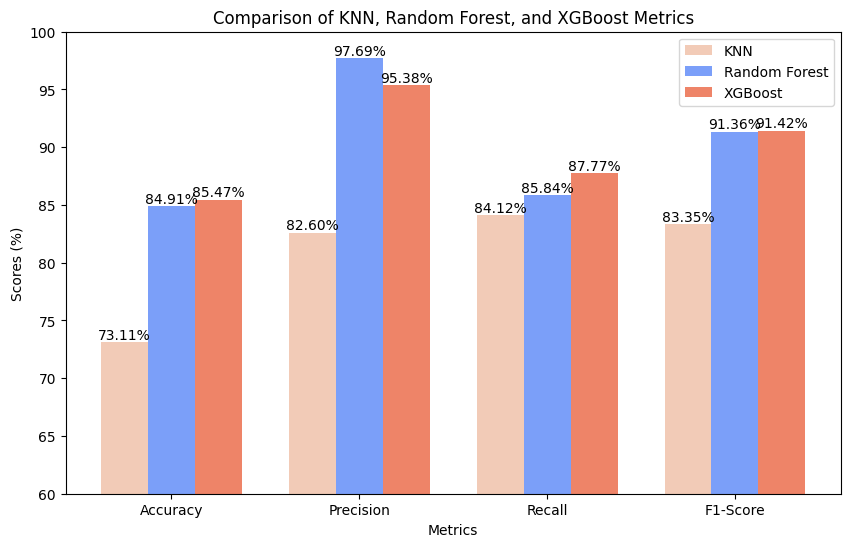

In [32]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [73.11, 82.60, 84.12, 83.35]
rf_scores = [84.91, 97.69, 85.84, 91.36]
xgb_scores = [85.47, 95.38, 87.77, 91.42]

x = np.arange(len(metrics))
width = 0.25

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
color_knn = plt.cm.coolwarm(0.6)
color_rf = plt.cm.coolwarm(0.2)
color_xgb = plt.cm.coolwarm(0.8)

bar1 = ax.bar(x - width, knn_scores, width, label='KNN', color=plt.cm.coolwarm(0.6))
bar2 = ax.bar(x, rf_scores, width, label='Random Forest', color=plt.cm.coolwarm(0.2))
bar3 = ax.bar(x + width, xgb_scores, width, label='XGBoost', color=plt.cm.coolwarm(0.8))

for i, v in enumerate(knn_scores):
    ax.text(x[i] - width, v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(rf_scores):
    ax.text(x[i], v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(xgb_scores):
    ax.text(x[i] + width, v, f'{v:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of KNN, Random Forest, and XGBoost Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(60, 100)
plt.show()

Hasil evaluasi menunjukkan bahwa **XGBoost** memiliki performa terbaik dengan nilai **F1-Score** tertinggi sebesar 91.42%, diikuti oleh **Random Forest** dengan nilai **F1-Score** sebesar 91.36%.

- **Random Forest** menunjukkan nilai **precision** tertinggi (97.69%), yang berarti model ini sangat andal dalam memprediksi kelas positif dengan akurasi tinggi. Namun, nilai **recall** sebesar 85.84% menunjukkan bahwa ada beberapa kelas positif yang tidak terdeteksi.

- **XGBoost** memiliki keseimbangan terbaik antara **precision** (95.38%) dan **recall** (87.77%), menghasilkan nilai **F1-Score** yang sedikit lebih tinggi daripada **Random Forest**.

- **KNN** memberikan performa yang kompetitif dengan nilai **F1-Score** sebesar 83.35%. Namun, nilai **accuracy** (73.11%) dan **precision** (82.60%) lebih rendah dibandingkan model lainnya, menunjukkan bahwa model ini cenderung memberikan lebih banyak prediksi positif yang salah (false positives).

## **5.2. Kesimpulan Modeling**

Berdasarkan hasil evaluasi:

1. **XGBoost** adalah model terbaik dalam proyek ini, dengan **F1-Score** tertinggi dan keseimbangan yang baik antara **precision** dan **recall**. Model ini sangat cocok untuk mendeteksi kasus positif sambil meminimalkan prediksi positif yang salah, menjadikannya pilihan utama untuk implementasi.

2. **Random Forest** memberikan performa hampir setara dengan XGBoost, dengan nilai **precision** yang lebih tinggi, membuatnya andal dalam memastikan akurasi prediksi positif. Model ini juga dapat digunakan sebagai alternatif utama jika diperlukan.

3. **KNN** menunjukkan performa yang layak tetapi berada di bawah XGBoost dan Random Forest. Model ini dapat dipertimbangkan untuk digunakan sebagai baseline model atau jika efisiensi komputasi menjadi prioritas utama.

### **Rekomendasi**
Dalam konteks bisnis, mendeteksi kelas positif dengan akurasi tinggi (high precision) dan memastikan sebanyak mungkin kasus positif terdeteksi (high recall) sangat penting. Oleh karena itu, **XGBoost** direkomendasikan sebagai model utama untuk diimplementasikan dalam mendeteksi karyawan yang rentan keluar. **Random Forest** dapat digunakan sebagai model cadangan dengan performa yang hampir sama baiknya.